In [ ]:
# For colab 
!pip insatll geopandas

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
map_df = gpd.read_file(
    ".\\Soil_อบ้านบึง\\Soil_อบ้านบึง\\Soil_อบ้านบึง.shp", encoding="tis-620")

In [4]:
map_df.head()

,FID_Soil25,soilgroup,fertility,texture_to,soilserien,pH_top,soilseries,FID_wgs84_,AMPHOE_IDN,AMP_CODE,AMPHOE_T,AMPHOE_E,PROV_CODE,PROV_NAM_T,PROV_NAM_E,P_CODE,geometry
0,2,59,ปานกลาง,ดินร่วนปนทราย,ตะกอนน้ำพาเชิงซ้อน,กรดจัดมากถึงกรดเล็กน้อย,AC,32,2002,02,อ.บ้านบึง,Amphoe Ban Bung,20,จ.ชลบุรี,Changwat Chonburi,CH,"POLYGON Z ((743823.402 1448571.102 0.000, 7438..."
1,4,60,ปานกลาง,ดินร่วนปนทราย,ตะกอนน้ำพาเชิงซ้อน,กรดจัดมากถึงกรดเล็กน้อย,AC,32,2002,02,อ.บ้านบึง,Amphoe Ban Bung,20,จ.ชลบุรี,Changwat Chonburi,CH,MULTIPOLYGON Z (((750071.328 1460144.873 0.000...
2,27,24hi,ต่ำ,ดินทรายปนดินร่วน,บ้านบึง,กรดจัดถึงกรดเล็กน้อย,Bbg,32,2002,02,อ.บ้านบึง,Amphoe Ban Bung,20,จ.ชลบุรี,Changwat Chonburi,CH,"POLYGON Z ((725976.658 1480424.193 0.000, 7259..."
3,28,44,ต่ำ,ดินทรายปนดินร่วน,บ้านบึง,กรดจัดถึงกรดเล็กน้อย,Bbg,32,2002,02,อ.บ้านบึง,Amphoe Ban Bung,20,จ.ชลบุรี,Changwat Chonburi,CH,MULTIPOLYGON Z (((722807.087 1479612.310 0.000...
4,29,44B,ต่ำ,ดินทรายปนดินร่วน,บ้านบึง,กรดจัดถึงกรดเล็กน้อย,Bbg,32,2002,02,อ.บ้านบึง,Amphoe Ban Bung,20,จ.ชลบุรี,Changwat Chonburi,CH,"POLYGON Z ((742890.585 1462959.488 0.000, 7428..."


<Axes: >

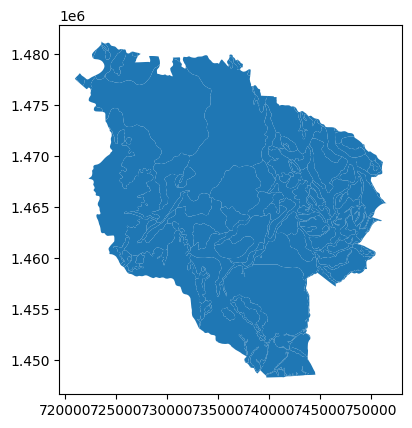

In [5]:
map_df.plot()

<Axes: >

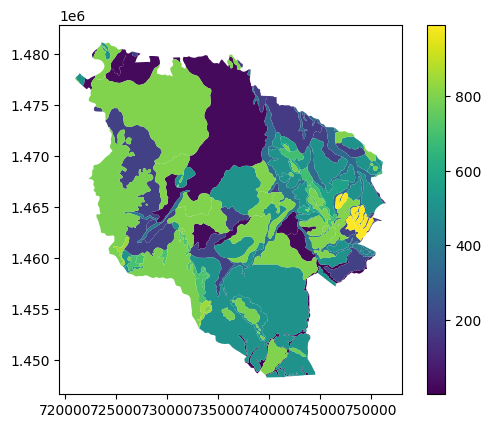

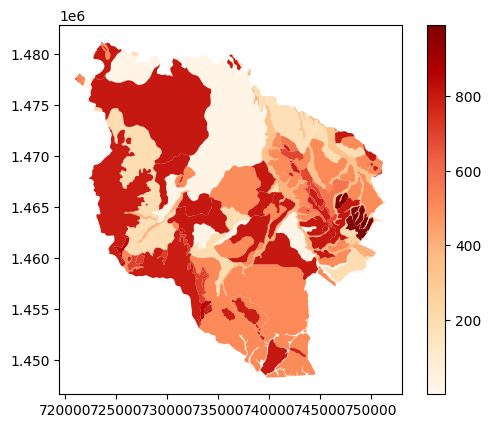

In [6]:
map_df.plot(column='FID_Soil25', legend=True)

map_df.plot(column='FID_Soil25', cmap='OrRd', legend=True)

1460000.0

In [53]:
map_df.explore()

In [14]:
lst_data = [[743823.4023000011],
            [1468571.10160000]]

# gpd.points_from_xy(
#     lst_data[0], lst_data[1])

gpd.GeoDataFrame([], geometry=gpd.points_from_xy(
    lst_data[0], lst_data[1]))

,geometry
0,POINT (743823.402 1468571.102)


In [18]:
point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([743823.4023000011], [1468571.10160000]))
result = map_df.contains(point.geometry[0])
print(result.sum())

1


In [17]:
map_df.contains(gpd.GeoDataFrame([], geometry=gpd.points_from_xy(
    lst_data[0], lst_data[1], crs="EPSG:32647"))).sum()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_17484\3021969660.py:1: UserWarning: The indices of the two GeoSeries are different.
  map_df.contains(gpd.GeoDataFrame([], geometry=gpd.points_from_xy(


0

In [ ]:
import pandas as pd

In [71]:
# Sampling data

space = 10

MIN_X = min(map_df.bounds.minx)
MAX_X = max(map_df.bounds.maxx)
MIN_Y = min(map_df.bounds.miny)
MAX_Y = max(map_df.bounds.maxy)

MIN_X, MAX_X, MIN_Y, MAX_Y

(721007.5762000002, 751541.292299999, 1448329.19, 1481256.9515999996)

In [72]:
map_df.columns

Index(['FID_Soil25', 'soilgroup', 'fertility', 'texture_to', 'soilserien',
       'pH_top', 'soilseries', 'FID_wgs84_', 'AMPHOE_IDN', 'AMP_CODE',
       'AMPHOE_T', 'AMPHOE_E', 'PROV_CODE', 'PROV_NAM_T', 'PROV_NAM_E',
       'P_CODE', 'geometry'],
      dtype='object')

In [73]:
header = ['x', 'y', 'FID_Soil25', 'soilgroup', 'fertility', 'texture_to', 'soilserien',
          'pH_top', 'soilseries', 'FID_wgs84_', 'AMPHOE_IDN', 'AMP_CODE',
          'AMPHOE_T', 'AMPHOE_E', 'PROV_CODE', 'PROV_NAM_T', 'PROV_NAM_E',
          'P_CODE']
arr = []

for x in np.arange(MIN_X, MAX_X, space):
    for y in np.arange(MIN_Y, MAX_Y, space):
        point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x], [y]))
        result = map_df.contains(point.geometry[0])
        if result.sum() > 0:
            # print([x, y, *map_df.loc[result][header[2:]].values[0]])
            arr.append([x, y, *map_df.loc[result][header[2:]].values[0]])

In [ ]:
df = pd.DataFrame(arr, columns=['x', 'y', *header[2:]])

In [ ]:
df.to_csv('sample_soil_data.csv', index=False)
df.to_parquet('sample_soil_data.parquet', index=False)